In [110]:
import pandas as pd
import urllib.request
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [112]:
train.head()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2399 non-null   int64  
 1   col1    2399 non-null   float64
 2   col2    2399 non-null   float64
 3   col3    2399 non-null   float64
 4   col4    2399 non-null   float64
 5   col5    2399 non-null   float64
 6   col6    2399 non-null   float64
 7   col7    2399 non-null   float64
 8   col8    2399 non-null   float64
 9   col9    2399 non-null   float64
 10  col10   2399 non-null   float64
 11  col11   2399 non-null   float64
 12  col12   2399 non-null   float64
 13  col13   2399 non-null   float64
 14  col14   2399 non-null   float64
 15  col15   2399 non-null   float64
 16  col16   2399 non-null   float64
 17  col17   2399 non-null   float64
 18  col18   2399 non-null   float64
 19  col19   2399 non-null   float64
 20  col20   2399 non-null   float64
dtypes: float64(20), int64(1)
memory usage

In [115]:
train.describe()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,...,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,3962.909952,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,...,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,2311.129964,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,...,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,...,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,3922.000000,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,...,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,5960.000000,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,...,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,7993.000000,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,...,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


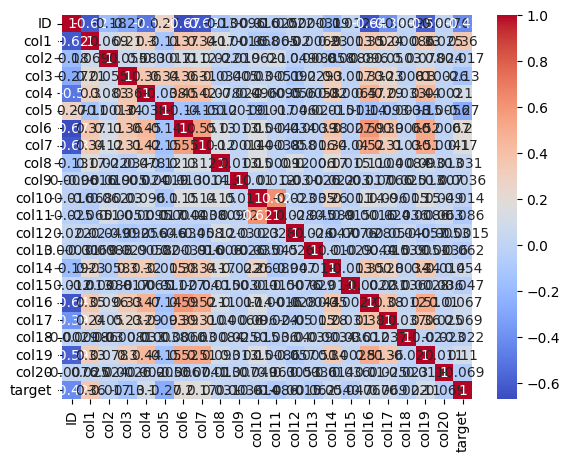

In [116]:
correlations = train.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.show()

In [117]:
train.corr()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
ID,1.000000,-0.622316,-0.182153,-0.272298,-0.495355,0.269412,-0.670282,-0.625041,-0.129477,-0.009559,...,0.022009,0.000314,-0.186106,0.011536,-0.635645,-0.386412,-0.002904,-0.590629,-0.007583,-0.416405
col1,-0.622316,1.000000,0.068536,0.209239,0.296823,-0.110139,0.366900,0.340983,0.169893,-0.001603,...,0.020401,-0.006932,0.232193,-0.012520,0.345596,0.244387,0.000861,0.327539,0.025411,0.358168
col2,-0.182153,0.068536,1.000000,0.055166,0.082996,-0.001662,0.110731,0.121478,0.022057,-0.018710,...,-0.048791,0.008791,-0.058001,0.008801,0.096208,0.049775,0.029816,0.078308,0.024384,-0.017318
col3,-0.272298,0.209239,0.055166,1.000000,0.360306,0.343399,0.355561,0.310508,-0.033510,0.004984,...,-0.092149,0.028841,0.301948,-0.016883,0.328398,0.227257,-0.008053,0.303467,0.002591,-0.132675
col4,-0.495355,0.296823,0.082996,0.360306,1.000000,-0.037666,0.445365,0.416649,0.078317,-0.023541,...,-0.055882,-0.005803,0.317054,-0.006503,0.471041,0.294568,0.033050,0.435385,0.001960,0.104875
col5,0.269412,-0.110139,-0.001662,0.343399,-0.037666,1.000000,-0.138517,-0.152531,-0.120050,0.001908,...,-0.046023,0.019647,-0.014961,-0.011347,-0.141748,-0.093256,0.003784,-0.153398,-0.005593,-0.271454
col6,-0.670282,0.366900,0.110731,0.355561,0.445365,-0.138517,1.000000,0.551453,0.129136,0.012978,...,-0.034044,0.003866,0.384610,-0.027252,0.590410,0.385324,0.006608,0.518238,-0.006657,0.198555
col7,-0.625041,0.340983,0.121478,0.310508,0.416649,-0.152531,0.551453,1.000000,0.121669,-0.001397,...,-0.058285,-0.015734,0.340895,-0.040220,0.516192,0.311134,0.029873,0.513997,-0.004092,0.174420
col8,-0.129477,0.169893,0.022057,-0.033510,0.078317,-0.120050,0.129136,0.121669,1.000000,0.013048,...,0.120507,-0.006042,0.168918,0.015245,0.109354,0.039575,0.008354,0.092649,0.012929,0.031497
col9,-0.009559,-0.001603,-0.018710,0.004984,-0.023541,0.001908,0.012978,-0.001397,0.013048,1.000000,...,0.030067,-0.002626,-0.021988,0.002967,-0.017018,0.006563,0.025123,0.013472,0.006963,0.003556


In [118]:
std_array = train.std().values
print(std_array)

[2.31112996e+03 1.27367684e+00 8.85109707e+00 2.54659082e-01
 1.22121974e+00 3.60721340e-02 2.58124368e+00 2.72472061e-01
 6.52470931e-01 4.36434780e-01 3.28953997e-01 3.77352558e-01
 5.79966830e-02 5.58179500e+00 5.68733533e-01 2.96007819e-03
 1.77298325e+01 2.32734680e+00 2.88274906e-02 1.44170486e-01
 2.69285615e-02 3.18260646e-01]


In [119]:
columns_to_keep_A = ['ID', 'col3', 'col5', 'col7', 'col9', 'col12', 'col15', 'col18', 'col19', 'col20', 'target']
train = train[columns_to_keep_A]
columns_to_keep_B = ['ID', 'col3', 'col5', 'col7', 'col9', 'col12', 'col15', 'col18', 'col19', 'col20']
test = test[columns_to_keep_B]

In [120]:
train

,ID,col3,col5,col7,col9,col12,col15,col18,col19,col20,target
0,4995,0.09,0.060,0.09,1.48,0.031,0.001,0.09,0.08,0.08,0
1,1709,0.32,0.030,0.56,1.36,0.170,0.006,0.02,0.45,0.06,0
2,7825,0.04,0.040,0.06,0.00,0.120,0.008,0.03,0.03,0.01,0
3,6918,0.03,0.090,0.00,0.03,0.055,0.000,0.09,0.01,0.05,0
4,5,0.03,0.003,0.43,0.11,0.135,0.006,0.08,0.19,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...
5592,3048,0.20,0.050,0.09,0.14,0.069,0.007,0.08,0.43,0.09,0
5593,2130,0.04,0.003,0.03,1.12,0.108,0.009,0.02,0.11,0.07,0
5594,5005,0.01,0.040,0.10,0.33,0.021,0.007,0.10,0.10,0.08,0
5595,2125,0.04,0.001,0.63,1.27,0.194,0.005,0.08,0.22,0.07,0


In [121]:
test

,ID,col3,col5,col7,col9,col12,col15,col18,col19,col20
0,2816,0.04,0.001,0.86,0.52,0.022,0.003,0.04,0.43,0.01
1,3641,0.63,0.110,0.83,1.21,0.001,0.009,0.10,0.12,0.01
2,7191,0.07,0.050,0.01,1.42,0.177,0.002,0.06,0.05,0.06
3,5199,0.04,0.030,0.03,0.88,0.032,0.003,0.06,0.03,0.07
4,7994,0.01,0.000,0.00,0.00,0.000,0.000,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
2394,7300,0.02,0.090,0.08,0.57,0.065,0.008,0.03,0.07,0.03
2395,1327,0.64,0.010,0.57,0.38,0.083,0.007,0.05,0.24,0.00
2396,4739,0.09,0.010,0.05,1.38,0.033,0.007,0.09,0.05,0.02
2397,2611,0.01,0.001,0.66,0.56,0.185,0.003,0.05,0.04,0.08


In [122]:
X = train[['col3', 'col5', 'col7', 'col9', 'col12', 'col15', 'col18', 'col19', 'col20']]
y = train[['target']]

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [124]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (3917, 9)
X_test (1680, 9)
y_train (3917, 1)
y_test (1680, 1)


In [125]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

c:\Users\jegar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [126]:
y_pred= logisticRegr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación -0.13055181695827733
MAE 0.11547619047619048
MAPE 0.11547619047619048
MSE 0.11547619047619048
RMSE 0.3398178783939869


In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [129]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [130]:
y_pred = dtr.predict(X_test)
y_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [131]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación -0.5632501283456595
MAE 0.16398809523809524
MAPE 356534970500164.25
MSE 0.15967261904761904
RMSE 0.39959056426249484
